다중공선성 문제: 독립변수 간에 강한 상관관계가 나타날 때 서로 높은 선형관계가 형성, 회귀분석에서 수학적으로 문제가 발생

- 해결책
  - 상관관계가 높은 독립변수 중에 한개 혹은 일부를 제거
  - 변수를 변형시키거나 새로운 관측치를 이용
- one-hot 인코딩으로 해결 가능

데이터 분할

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/wine.data'
wine = pd.read_csv(url, header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
cols = ['target', 'Alcohol',    'Malic acid',    'Ash',   'Alcalinity of ash',    'Magnesium',
   'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
   'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline']

In [4]:
wine.columns = cols
wine.head()

,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
np.unique(wine['target'])

array([1, 2, 3])

In [6]:
from sklearn.model_selection import train_test_split
x = wine.iloc[:,1:]
y = wine.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0, stratify=y)

In [7]:
np.unique(y_train, return_counts=True)

(array([1, 2, 3]), array([41, 50, 33]))

스케일 맞추기
  - 스케일이 필요없는 머신러닝 알고리즘
  - 그외는 전부 필요함 특히 경사하강법은 성능향상이 크다
  - 아달린, 제곱오차 - 오차가 큰 특성의 값으로 가중치를 갱신
  - k -최근접 이웃의 경우 스케일에 영향을 많이 받음
  - 정규화
    - 특성의 스케일을 [0,1]의 범위에 맞춤
    - (xi - x_min) / (x_max - x_min)
  - 표준화(standardization)

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(x_train)
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.fit_transform(x_test)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

RobustScaler
  - 이상치가 많은 데이터 그러나 샘플의 크기가 작다
  - 과대적합이 쉽게 되는 데이터셋
  - 4분위수를 가지고 스케일을 조정하기 때문에 이상치에 영향을 덜 받는다

In [10]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit(x_train)
x_train_r = rs.transform(x_train)
x_test_r = rs.transform(x_test)

특성 선택하기
  - 과대적합(overfitting): 학습데이터의 성능이 워낙 뛰어나고 반대로 테스트 데이터는 형편없는 경우
  - 과한 학습, 훈련데이터셋의 특정 샘플들에 대해서 모델의 파라매터가 너무 가깝게 맞춰져 있다
  - 일반화가 안되서 모델 분산이 크다
  - 데이터에 비해서 모델이 복잡

해결책
  - 모델 단순화
  - 더 많은 훈련 데이터
  - 규제를 통한 복잡도를 제한
  - 데이터의 차원을 줄임

유용한 특성을 선택
  - 특성선택을 통해서 차원축소하면 데이터에 학습되는 파라매터 개수가 줄어들면서 모델이 더 간단해짐

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression(solver='liblinear', penalty='l1', C = 1.0, random_state=1)

In [13]:
lr.fit(x_train_norm, y_train)
lr.score(x_train_norm, y_train)

0.9758064516129032

규제강도에 따른 특성의 가중치 변화 그래프

In [14]:
import matplotlib.pyplot as plt

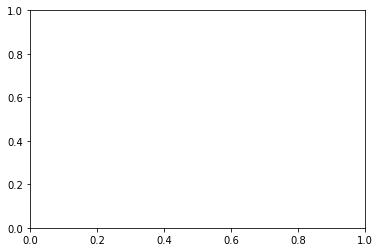

In [15]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weight, params = [], []
for c in np.arange(-4.0, 6.0):
  lr = LogisticRegression(solver='liblinear', penalty='l1', C = 10**c, random_state=1)
  lr.fit(x_train_r, y_train)
  weight.append(lr.coef_[1])
  params.append(10**c)

In [16]:
weight = np.array(weight)
weight.shape

(10, 13)

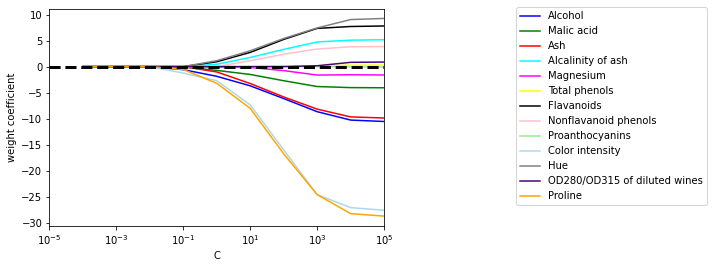

In [17]:
fig = plt.figure()
ax = plt.subplot(111)
for column, color in zip(range(weight.shape[1]), colors):
  plt.plot(params, weight[:, column], label = wine.columns[column+1], color=color)
plt.axhline(0,color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.xscale('log')
plt.legend()
ax.legend(
    bbox_to_anchor = (1.38,1.03),
    ncol =1, fancybox=True
)

랜덤포레스트를 이용한 중요도

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [20]:
# 학습
forest.fit(x_train, y_train)
# 피처의 중요도 출력
forest.feature_importances_

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

In [21]:
forest.feature_names_in_

array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'], dtype=object)

In [22]:
importances_x = forest.feature_names_in_[np.argsort(forest.feature_importances_)[::-1]]
importances_x

array(['Proline', 'Flavanoids', 'Color intensity',
       'OD280/OD315 of diluted wines', 'Alcohol', 'Hue', 'Total phenols',
       'Magnesium', 'Malic acid', 'Proanthocyanins', 'Alcalinity of ash',
       'Nonflavanoid phenols', 'Ash'], dtype=object)

In [23]:
importances_y = np.sort(forest.feature_importances_)[::-1]

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

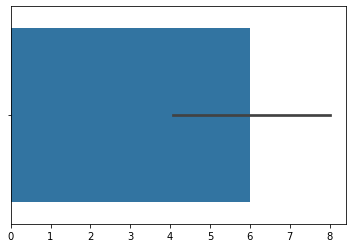

In [24]:
import seaborn as sns
sns.barplot(np.argsort(forest.feature_importances_)[::-1])

<BarContainer object of 13 artists>

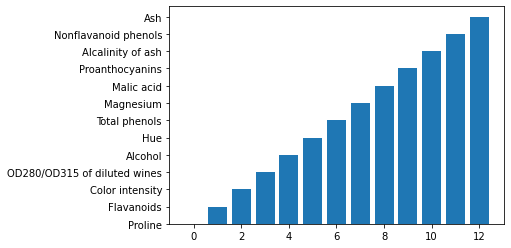

In [25]:
plt.bar(range(x_train.shape[1]), forest.feature_names_in_[np.argsort(forest.feature_importances_)[::-1]])

<BarContainer object of 13 artists>

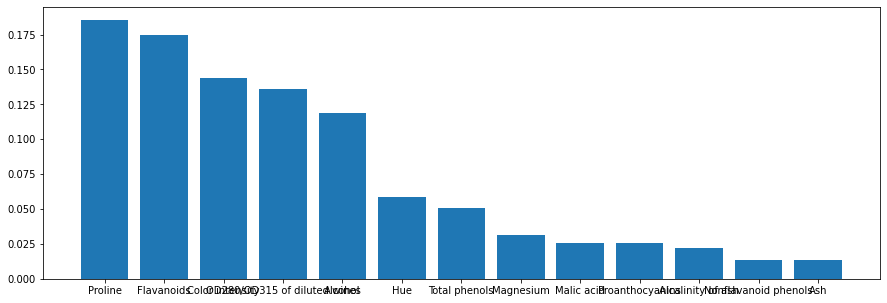

In [26]:
plt.figure(figsize=(15,5))
plt.bar(importances_x, importances_y)

차원축소

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)
lr = LogisticRegression(random_state=1)

In [29]:
# 데이터는 표준화(Standard or Robustic)
pca.fit(x_train_r)
x_train_pca = pca.transform(x_train_r)
x_test_pca = pca.transform(x_test_r)

In [30]:
x_train_pca.shape, x_test_pca.shape

((124, 2), (54, 2))

<AxesSubplot:>

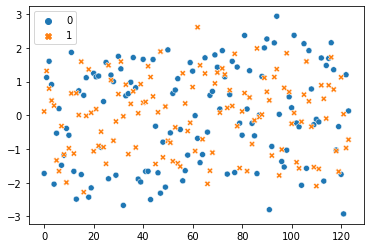

In [31]:
# plt.scatter(x_train_pca[:,0], x_train_pca[:,1])
sns.scatterplot(data=x_train_pca)

In [32]:
lr.fit(x_train_pca, y_train)
lr.score(x_train_pca, y_train), lr.score(x_test_pca, y_test)

(0.9354838709677419, 0.9259259259259259)

In [33]:
np.unique(y_train)

array([1, 2, 3])

In [34]:
# 단일 신경망에 wine 데이터를 분류
# 머신러닝
# 모델 - fit - score - predict
# 인공신경망(퍼셉트론)
# (Dense - Sequence - compile) - fit - evaluate - predict
x_train_pca.shape

(124, 2)

In [35]:
import tensorflow as tf

In [36]:
dense = tf.keras.layers.Dense(3,activation='softmax', input_shape = (x_train_pca.shape[1],))
model = tf.keras.Sequential(dense)
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics='accuracy')

In [37]:
y_train_map = y_train.map({
    1:0,
    2:1,
    3:2
})

In [40]:
model.fit(x_train_pca, y_train_map, epochs=10)

Epoch 1/10


TypeError: ignored

In [39]:
dense1 = tf.keras.layers.Dense(10, activation='softmax', input_shape = (x_train_pca.shape[1],))
dense2 = tf.keras.layers.Dense(3, activation='softmax')

model = tf.keras.Sequential(dense1, dense2)
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics='accuracy')